<a href="https://colab.research.google.com/github/LejoFlores/Open-And-Reproducible-Research-Computing/blob/main/IntroToHydroPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nwis

     |████████████████████████████████| 317kB 7.7MB/s 
     |████████████████████████████████| 4.7MB 15.8MB/s 
     |████████████████████████████████| 133kB 44.2MB/s 
     |████████████████████████████████| 727kB 46.8MB/s 
     |████████████████████████████████| 747kB 49.4MB/s 
  Created wheel for bmipy: filename=bmipy-2.0-cp37-none-any.whl size=7246 sha256=9f16943ad2bf7272da0bb55a53f820144471e548541be355149deea02b4adc81
  Stored in directory: /root/.cache/pip/wheels/2a/da/33/d583e2ee2116eb9167c44497f70b6c4a77508e6f8578d156eb
Successfully built bmipy
  Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nwis import Nwis

In [ ]:
# Set site ID and start/end dates
# site_id = '13185000' # Boise River at Twin Springs
# site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06721500' # North St. Vrain near Allen's Park (CO)
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start = '2015-10-01'
my_end = '2020-09-30'

In [ ]:
# Get data from NWIS
nwis_data = Nwis()
dataset = nwis_data.get_data(site=site_id, start_date=my_start, end_date=my_end, data_type='dv')

In [ ]:
# Show variable metadata
for var_name in dataset.data_vars:
  print(var_name)
  print(dataset[var_name].attrs)

00060
{'variable_name': 'discharge', 'variable_unit': 'cubic feet per second', 'variable_data_type': 'instantaneous value'}


In [ ]:
dataset['00060']

<xarray.DataArray '00060' (datetime: 1827)>
array([752., 751., 759., ..., 511., 514., 527.])
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-10-01 2015-10-02 ... 2020-09-30
Attributes:
    variable_name:       discharge
    variable_unit:       cubic feet per second
    variable_data_type:  instantaneous value

In [ ]:
Q = dataset['00060'].values
dates = dataset['datetime'].values

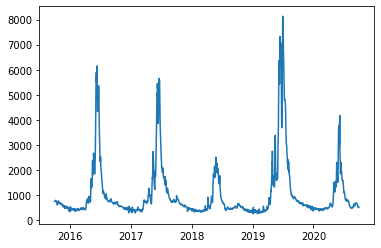

In [ ]:
plt.plot(dates,Q)

Text(0, 0.5, 'Discharge [ft^3/s]')

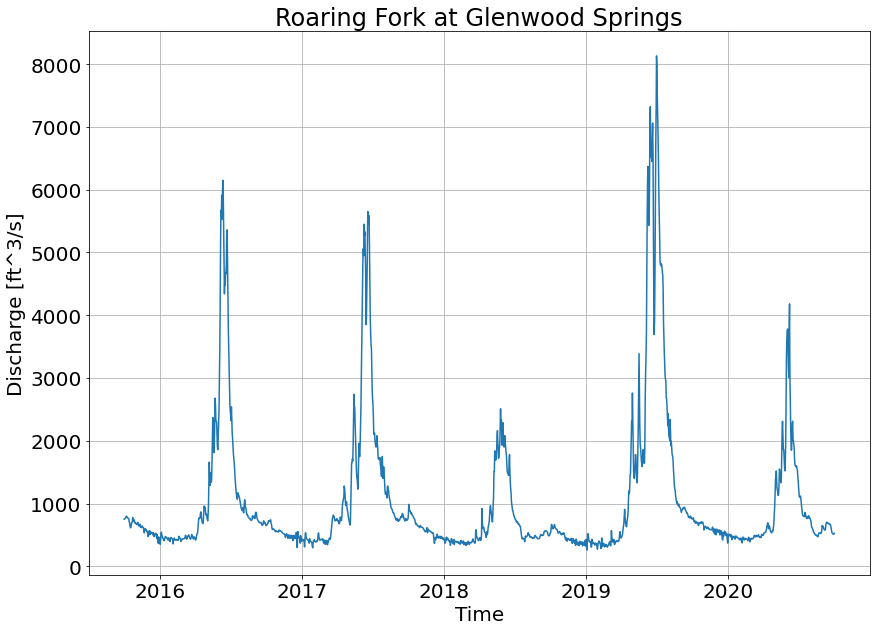

In [ ]:
plt.figure(figsize=(14,10)) # Create an empty plot that is 14" wide x 10" tall
plt.rcParams.update({'font.size': 20}) # Increase the font size
plt.plot(dates,Q) # Plot discharge versus time
plt.grid() # Turn on the major axes grids for clarity

## CHANGE THIS ~>
plt.title('Roaring Fork at Glenwood Springs')

plt.xlabel('Time') # Label the x-axis
plt.ylabel('Discharge [ft^3/s]') # Label the y-axis

In [ ]:
WY = dataset['datetime.year'].values
dates = pd.DatetimeIndex(dates)

WY[dates.month>=10] += 1
WY

array([2016, 2016, 2016, ..., 2020, 2020, 2020])

In [ ]:
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge'] = Q

In [ ]:
df

,Dates,WaterYear,Discharge
0,2015-10-01,2016,752.0
1,2015-10-02,2016,751.0
2,2015-10-03,2016,759.0
3,2015-10-04,2016,764.0
4,2015-10-05,2016,773.0
...,...,...,...
1822,2020-09-26,2020,518.0
1823,2020-09-27,2020,514.0
1824,2020-09-28,2020,511.0
1825,2020-09-29,2020,514.0


In [ ]:
df.to_pickle('MyFirstPickle.pkl')

In [ ]:
!ls

MyFirstPickle.pkl  sample_data


In [ ]:
df.groupby(by=df.WaterYear).max()

,Dates,Discharge
WaterYear,,
2016,2016-09-30,6150.0
2017,2017-09-30,5650.0
2018,2018-09-30,2510.0
2019,2019-09-30,8130.0
2020,2020-09-30,4180.0


In [ ]:
df.groupby(by=df.WaterYear).mean()

,Discharge
WaterYear,
2016,1090.221311
2017,1129.402740
2018,693.767123
2019,1481.112329
2020,816.844262


In [ ]:
df.groupby(by=df.WaterYear).sum()*86400 / 43560

,Discharge
WaterYear,
2016,7.914466e+05
2017,8.176502e+05
2018,5.022645e+05
2019,1.072276e+06
2020,5.929884e+05
